In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
plt.style.use("seaborn")

In [2]:
#Get or Create Dataset
X,y=make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

#Normalization
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

In [3]:
print(X.shape)

(10000, 20)


In [4]:
#Add a column of 1s for vectorization (Adding X0=1 feature)
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [5]:
#Vectorization
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m=X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    #Here we are iterating over examples and keeping the features fixed
    #It can be easily understood by the formulae
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Batch Gradient descent =>compute the gradient wrt to entire dataset
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [6]:
def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_iters=30):
    
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    #In mini-batch gradient descent we need to shuffle the data
    # therefore we are stacking X and y together.
    data=np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_iters):
        
        #Mini Batch Gradient Descent
        np.random.shuffle(data) # Randomly shuffling the data
        m=data.shape[0]
        total_batches=m//batch_size
        
        for i in range(total_batches):
            batch_data=data[i*batch_size:(i+1)*batch_size,:]
            
            x_batch=batch_data[:,:-1] # for all the rows extract all col. except the last col
            y_batch=batch_data[:,-1]  # for all the row extract the last column only
            
            batch_gradient=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_gradient
            e=error(x_batch,y_batch,theta)
            error_list.append(e)
            
    return theta,error_list

100.24267545758073


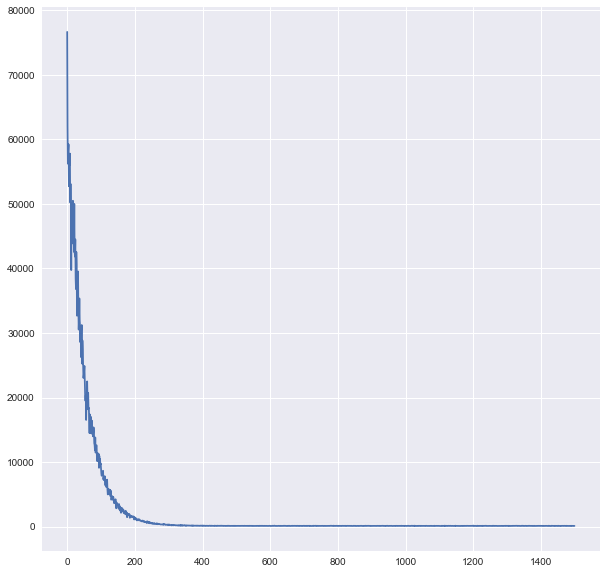

In [7]:
#Mini Batch Gradient Descent -100 iteration , lr-0.01
theta,error_list=batch_gradient_descent(X,y)
plt.figure(figsize=(10,10))
final_error=error_list[-1]
print(final_error)
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

101.4597143861767


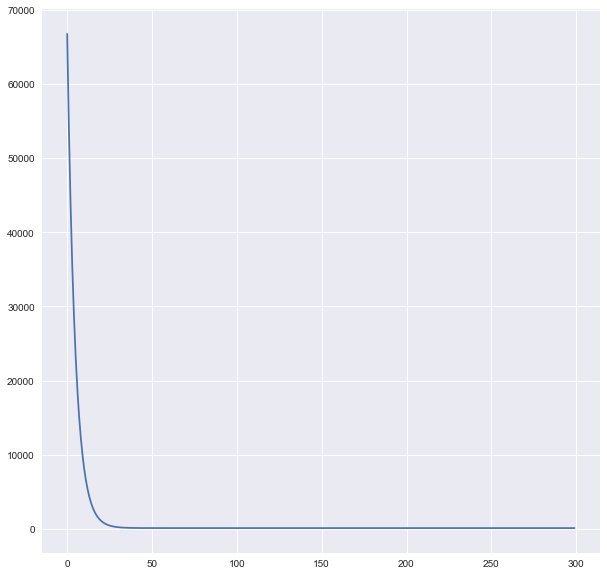

In [8]:
#Batch Gradient Descent -300 iteration , lr-0.01
theta,error_list=gradient_descent(X,y)
plt.figure(figsize=(10,10))
final_error=error_list[-1]
print(final_error)
plt.plot(np.arange(len(error_list)),error_list)
plt.show()